In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image
import imagehash
import torch
from collections import Counter

# **AI generated vs real images detection. Classifying deepfake and real images**

## **ABSTRACT**

This will be added in the end........


## **1.Introduction**

The rapid advancements in artificial intelligence have transformed the field of image generation (Stephan Bohm et al., n.d.)[1] . Modern generative models, such as Generative Adversarial Networks (Goodfellow et al., 2014)[2] and Latent Diffusion Models (Rombach et al., 2021)[3], can produce almost realistic images that are often indistinguishable from those created by humans. This technology has enabled innovative applications in art, design, and entertainment (Van Waning, 2024)[4] . However, it also introduces significant concerns, particularly around misinformation, intellectual property, ethical usage, digital security, and public trust (Kamali et al., 2024)[5].

AI-generated images are a double-edged sword. While they empower creative industries and expand access to content creation tools, they also pose serious societal risks (Stephan Bohm et al., n.d.)[1]. Misinformation is a major concern, as fake images can be used to spread false information, influence opinions, or create fake evidence. For example, an AI-generated image could falsely show someone committing a crime, damaging their reputation or affecting legal cases. (Bird & Lotfi, 2023) [6]

The risks extend to cybersecurity, where AI-generated human faces and biometric data have been used to bypass security systems. Additionally, the rise of deepfake technology amplifies these challenges, eroding trust in visual media and complicating the work of journalists, law enforcement, and other stakeholders who rely on image authenticity. (Bird & Lotfi, 2023) [6]

Although people can often notice small visual clues in fake images, modern AI is becoming so advanced that it’s harder to spot the difference. Unlike earlier generations, which exhibited obvious flaws, modern synthetic images seamlessly mimic real-world details. However, certain artifacts—such as anatomical errors (e.g., malformed hands), stylistic inconsistencies (e.g., unnatural lighting), and sociocultural inaccuracies (e.g., cultural norm violations)—can still serve as critical indicators for detection (Kamali et al., 2024)[5] Ediboglu and Akyol (2023)[7].

This project aims to ................................................

## **2.Related work**

Various methods have been proposed for distinguishing AI-generated images from real ones. ResNets (He et al., 2015)[8] , a type of convolutional neural network (CNN) (O’Shea & Nash, 2015)[9], are widely used due to their ability to analyze high-level features while mitigating the vanishing gradient problem with residual connections. These properties allow ResNets to often outperform other models in classification tasks by learning intricate patterns and textures in images. Ediboglu and Akyol (2023)[7] (Bird & Lotfi, 2023) [6]

CNNs more broadly remain a reliable choice for feature extraction and classification. Their ability to process spatial hierarchies in image data makes them highly effective for identifying subtle differences between real and AI-generated images. CNNs are frequently used as a foundation for other advanced models.(Maruthiram et al., 2024)[10].

Variational Autoencoders (VAEs) (Kingma & Welling, 2013)[11] have also been explored, primarily for anomaly detection. By reconstructing input images and identifying deviations from natural patterns, VAEs can highlight inconsistencies in synthetic images. However, they tend to underperform compared to discriminative models like ResNets when applied to complex datasets such as CIFAKE. Ediboglu and Akyol (2023)[7]

Transformer-based models, such as Vision Transformer (Dosovitskiy et al., 2020)[12], have gained traction for their attention mechanisms, which enable them to capture global dependencies in image data. This makes them particularly effective at handling diverse and complex datasets. Models like Swin Transformers further enhance performance by combining hierarchical feature extraction with the efficiency of attention-based architectures. Ediboglu and Akyol (2023)[7] (Bird & Lotfi, 2023) [6] (Maruthiram et al., 2024)[10]

Finally, explainability tools, such as Grad-CAM (Selvaraju et al., 2019)[13], help to interpret model decisions by visualizing the image regions most influential in classifications. These tools often reveal that classifiers rely on subtle imperfections or artifacts in AI-generated images—features that are difficult for humans to detect but crucial for accurate classification.(Maruthiram et al., 2024)[10].

This project will build on all of these approaches, they have been used on other datasets(CIFAKE or AiARt). We will ........................................

## **3.Data acquisition, exploration and working with images**

### **Data acquisition**

The data is acquired through Kaggle and it's free for use. The dataset consists of authentic images sampled from the Shutterstock platform across various categories, including a balanced selection where one-third of the images feature humans. These authentic images are paired with their equivalents generated using state-of-the-art generative models. This structured pairing enables a direct comparison between real and AI-generated content, providing a robust foundation for developing and evaluating image authenticity detection systems. This is the official dataset for the 2025 Women in AI Kaggle Competition.

AI vs. Human-Generated Images; By: Alessandra Sala, Margarita Pitsiani, Manuela Jeyaraj, Toma Ijatomi; License: Apache 2.0 ; Link to data: https://www.kaggle.com/datasets/alessandrasala79/ai-vs-human-generated-dataset/data

To note: No one from the above mentioned has worked on the same dataset as this one.

NOTE: I am working on v1 of the dataset, which was updated on 22/01/2025. The difference with v2 is that v2 has the same train set, but a smaller test set(5k files) with different images than the ones I have in v1.

### **Data overview and loading**
1. Let's look at the csv file to see whether it's tidy, has any missing values or duplicates and gain more knowledge about the dataset .

In [47]:
train_df = pd.read_csv("train.csv")
train_df

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1
...,...,...,...
79945,79945,train_data/9283b107f6274279b6f15bbe77c523aa.jpg,0
79946,79946,train_data/4c6b17fe6dd743428a45773135a10508.jpg,1
79947,79947,train_data/1ccbf96d04e342fd9f629ad55466b29e.jpg,0
79948,79948,train_data/ff960b55f296445abb3c5f304b52e104.jpg,1


In [52]:
train_df.shape

(79950, 3)

2. As we can see we have 79950 observations corresponding to the 79950 training images in the dataset and 3 features. Features being the name of the image(file_name) and the corresponding label(0 or 1) and an Unnamed feature.
3. The names of the columns are in snake_case already, which makes work better.
4. From first sight I can see somewhat redundant train_data/ path that could possibly be problematic as then the path would be train_data/train_data/a6dcb93f596a43249135678dfcfc17ea.jpg. Its not only the name of the file, it doesn't need the path.
5. Also the column Unnamed:0 doesn't do much and its just the same as the id so i will probably drop it.
6. Let's perform the changes

In [65]:
train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False) 
train_df = train_df.drop(columns=["Unnamed: 0"]) 

In [67]:
train_df

,file_name,label
0,a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,041be3153810433ab146bc97d5af505c.jpg,0
2,615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,8542fe161d9147be8e835e50c0de39cd.jpg,0
4,5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1
...,...,...
79945,9283b107f6274279b6f15bbe77c523aa.jpg,0
79946,4c6b17fe6dd743428a45773135a10508.jpg,1
79947,1ccbf96d04e342fd9f629ad55466b29e.jpg,0
79948,ff960b55f296445abb3c5f304b52e104.jpg,1


6. Now it looks better let's see whether we have any missing values or duplicates

In [69]:
train_df.isnull().sum()

file_name    0
label        0
dtype: int64

7. Now let's see if there are any duplicates 

In [74]:
train_df.duplicated().sum()

0

8. There are no duplicates and now let's see if the data types are correct, which could reveal a NaN value that wasn't initially found

In [80]:
train_df.dtypes

file_name    object
label         int64
dtype: object

9. The datatypes look correct, now let's see the distribution of the classes, to see whether we will be working with disbalanced dataset, which would require additional actions(sampling techniques and data gathering)

In [86]:
train_df.label.value_counts()

label
1    39975
0    39975
Name: count, dtype: int64

10. The data is perfectly seperated with even instances for class 0 and class 1.
11. Now let's see one instance from both classes to understand what we are dealing with and which class is AI generated images and which is real images

In [136]:
label_images = train_df.groupby('label').first()['file_name']
train_images_path = 'train_data'

12. Let's define a function to plot the images,

In [139]:
def plot_images(image_paths, labels, title="Label Examples"):
    """
    Plot a series of images with their corresponding labels.

    Args:
        image_paths (list of str): List of file paths to the images to be displayed.
        labels (list of int or str): List of labels corresponding to each image.
        title (str, optional): Title of the entire plot. Default is "Label Examples".

    Returns:
        None: The function displays a matplotlib plot but does not return anything.

    Example:
        image_paths = ["path/to/image1.jpg", "path/to/image2.jpg"]
        labels = [0, 1]
        plot_images(image_paths, labels, title="Sample Images")
    """
    plt.figure(figsize=(10, 5))
    for idx, (img_path, label) in enumerate(zip(image_paths, labels)):
        img = Image.open(img_path)
        plt.subplot(1, len(labels), idx + 1)
        plt.imshow(img)
        plt.title(f"Label {label}")
        plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [141]:
image_paths = [os.path.join(train_images_path, img) for img in label_images]
labels = label_images.index.tolist()

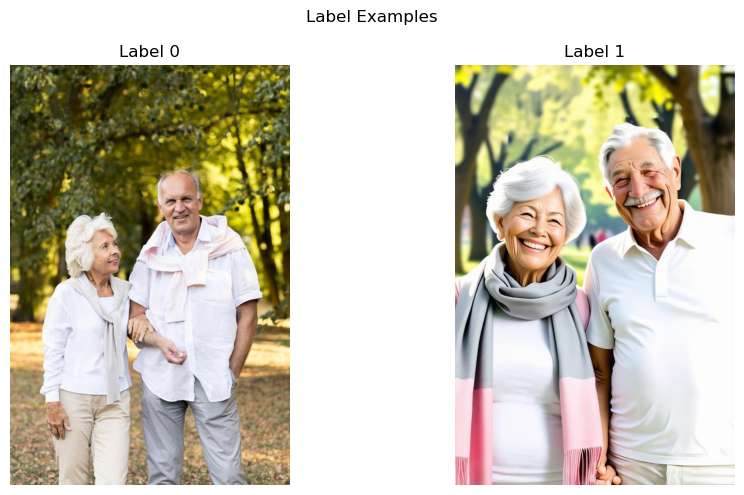

In [143]:
plot_images(image_paths, labels)

13. As it can be seen, or maybe not for everybody. The picture under label 0 is the real image. But why?
14. The obvious hints Label 1 is AI generated are:
- The overly smooth skin and details: AI often struggles with capturing realistic skin aging details, such as natural wrinkles or subtle blemishes. The skin is too smooth.
- Symmetry and unrealistic perfection: AI images may exhibit unnaturally perfect facial symmetry or expressions that look slightly exaggerated, such as overly bright smiles or perfectly aligned teeth.
- Background Details: The background elements (e.g., trees and lighting in this image) might appear slightly inconsistent or blurry, especially where the foreground and background meet. AI sometimes generates repetitive or strange patterns in the background when creating scenes.
- Clothing and Accessories: AI-generated scarves, shirts, or other clothing may have unnatural folds or textures. Look for inconsistencies, such as strange shadows or unrealistic interactions with light.
- Eye and Hair Details: Eyes may look overly sharp or glassy, and the reflections within them might not match the surrounding environment. Hair strands can appear too perfect or lack the natural messiness of real hair.
- Hands and Fingers: While this image appears focused on faces, hands and fingers in AI-generated images are often distorted, with unusual proportions or extra/missing fingers.
- General Vibe: The image might feel too staged or "perfect," almost like a stock photo but slightly off in a way that's hard to describe.

15. This dataset is structured so that every real image has it's AI generated counterpart. The csv file contains the label for the images. The idea is to train a model to be able to find the differences between AI and real image

## **4.Model training(ResNet50, VGG, Visual transformers)**

### **ResNet50 with simple augmentation**

I will be performing Resnet50 model implementation. First i will do, then i will(explain code with ch). Augmentations are these because

In [ ]:
# import os
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import transforms, models
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm
# from PIL import Image
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import json
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # --- Custom Dataset ---
# class ImageDataset(Dataset):
#     def __init__(self, csv_file, img_dir, transform=None):
#         self.annotations = csv_file
#         self.img_dir = img_dir
#         self.transform = transform

#     def __len__(self):
#         return len(self.annotations)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
#         image = Image.open(img_path).convert("RGB")
#         label = torch.tensor(int(self.annotations.iloc[idx, 1]))

#         if self.transform:
#             image = self.transform(image)

#         return image, label

# # --- Early Stopping ---
# class EarlyStopping:
#     def __init__(self, patience=5, verbose=True):
#         self.patience = patience
#         self.verbose = verbose
#         self.counter = 0
#         self.best_loss = None
#         self.early_stop = False

#     def __call__(self, val_loss, model, optimizer, epoch, path="best_model.pth"):
#         if self.best_loss is None or val_loss < self.best_loss:
#             self.best_loss = val_loss
#             self.counter = 0
#             torch.save({
#                 "epoch": epoch,
#                 "model_state_dict": model.state_dict(),
#                 "optimizer_state_dict": optimizer.state_dict(),
#                 "best_loss": self.best_loss
#             }, path)
#             if self.verbose:
#                 print(f"Validation loss improved to {val_loss:.4f}. Checkpoint saved!")
#         else:
#             self.counter += 1
#             if self.verbose:
#                 print(f"No improvement. EarlyStopping counter: {self.counter}/{self.patience}")
#             if self.counter >= self.patience:
#                 self.early_stop = True

# # --- Data Preparation ---
# csv_path = "train.csv"
# train_df = pd.read_csv(csv_path)
# train_df["file_name"] = train_df["file_name"].str.replace("train_data/", "", regex=False)
# train_df = train_df.drop(columns=["Unnamed: 0"])

# train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

# train_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# val_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# img_dir = "train_data"
# train_dataset = ImageDataset(train_df, img_dir, transform=train_transform)
# val_dataset = ImageDataset(val_df, img_dir, transform=val_transform)

# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# # --- Model Setup ---
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.resnet50(pretrained=True)
# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, 1)
# model = model.to(device)

# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4) 

# # --- Resume Training ---
# def load_checkpoint(path, model, optimizer):
#     if os.path.exists(path):
#         checkpoint = torch.load(path)
#         model.load_state_dict(checkpoint["model_state_dict"])
#         optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
#         start_epoch = checkpoint["epoch"] + 1
#         best_val_loss = checkpoint["best_loss"]
#         print(f"Resuming from epoch {start_epoch} with best validation loss {best_val_loss:.4f}")
#         return start_epoch, best_val_loss
#     else:
#         print("No checkpoint found. Starting from scratch.")
#         return 0, float("inf")

# # --- Training and Validation Functions ---
# def train_one_epoch(model, train_loader, criterion, optimizer, device):
#     model.train()
#     running_loss = 0.0

#     for images, labels in tqdm(train_loader, desc="Training"):
#         images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#     epoch_loss = running_loss / len(train_loader.dataset)
#     return epoch_loss

# def validate(model, val_loader, criterion, device):
#     model.eval()
#     running_loss = 0.0
#     all_labels = []
#     all_outputs = []

#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc="Validation"):
#             images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

#             outputs = model(images)
#             loss = criterion(outputs, labels)

#             running_loss += loss.item() * images.size(0)
#             all_labels.append(labels.cpu().numpy())
#             all_outputs.append(outputs.cpu().numpy())

#     epoch_loss = running_loss / len(val_loader.dataset)
#     all_labels = np.concatenate(all_labels)
#     all_outputs = torch.sigmoid(torch.tensor(np.concatenate(all_outputs))).numpy()

#     # Compute Metrics
#     val_preds = (all_outputs > 0.5).astype(int)
#     accuracy = accuracy_score(all_labels, val_preds)
#     precision = precision_score(all_labels, val_preds)
#     recall = recall_score(all_labels, val_preds)
#     f1 = f1_score(all_labels, val_preds)
#     auc = roc_auc_score(all_labels, all_outputs)

#     return epoch_loss, accuracy, precision, recall, f1, auc

# # --- Main Training Script ---
# num_epochs = 20
# checkpoint_path = "best_model.pth"
# start_epoch, best_val_loss = load_checkpoint(checkpoint_path, model, optimizer)
# early_stopping = EarlyStopping(patience=5, verbose=True)

# train_losses = []
# val_losses = []
# val_accuracies = []

# for epoch in range(start_epoch, num_epochs):
#     print(f"Epoch {epoch+1}/{num_epochs}")

#     train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
#     train_losses.append(train_loss)

#     val_loss, accuracy, precision, recall, f1, auc = validate(model, val_loader, criterion, device)
#     val_losses.append(val_loss)
#     val_accuracies.append(accuracy)

#     print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
#           f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
#           f"F1-score: {f1:.4f}, AUC: {auc:.4f}")

#     early_stopping(val_loss, model, optimizer, epoch, path=checkpoint_path)
#     if early_stopping.early_stop:
#         print("Early stopping triggered!")
#         break

# metrics = {"train_loss": train_losses, "val_loss": val_losses, "val_accuracy": val_accuracies}
# with open("training_metrics.json", "w") as f:
#     json.dump(metrics, f)
# print("Saved training metrics to 'training_metrics.json'")

# print("Training Complete.")


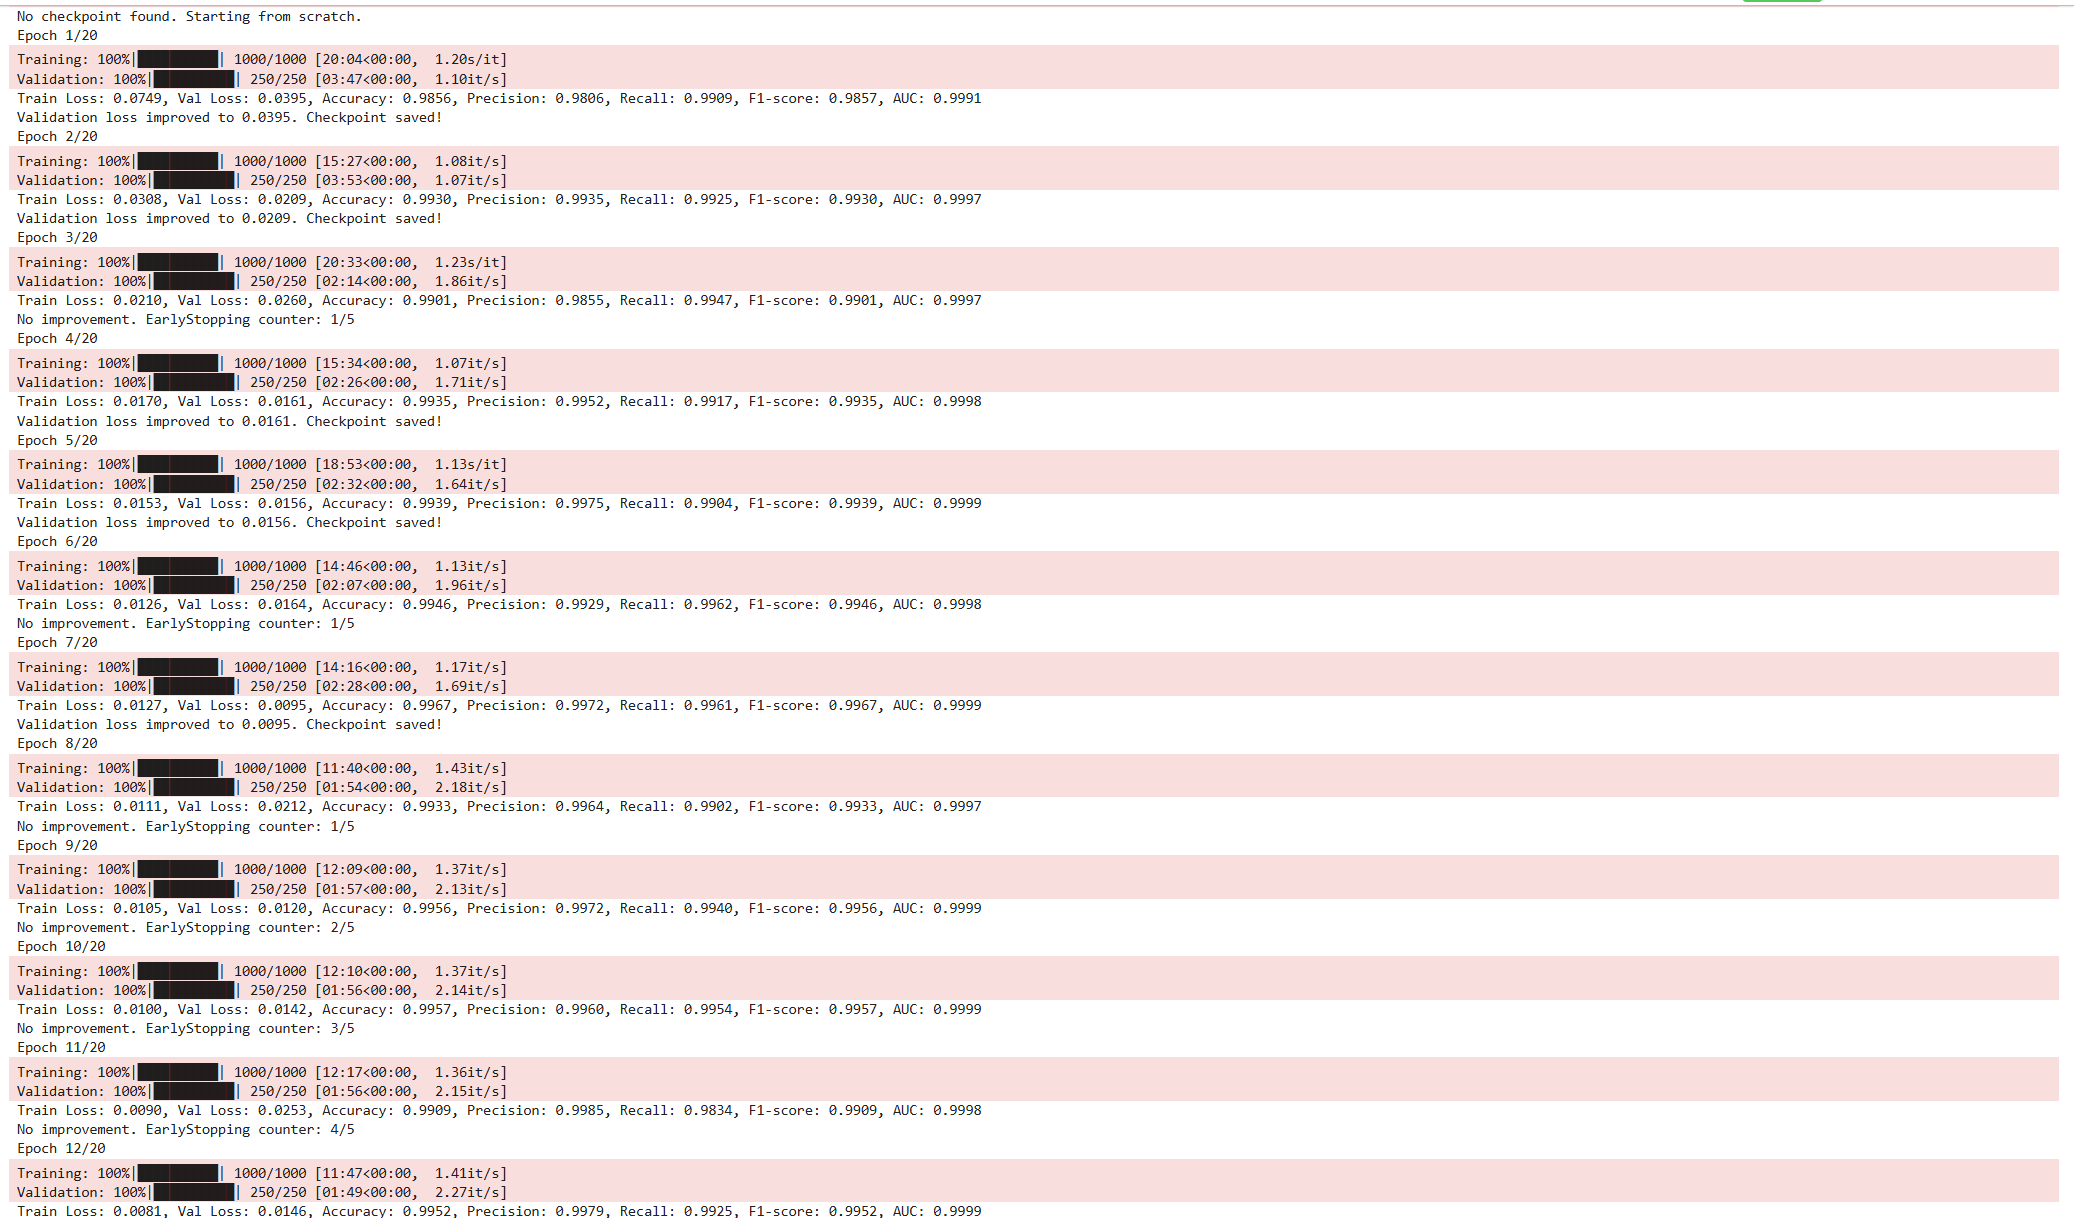

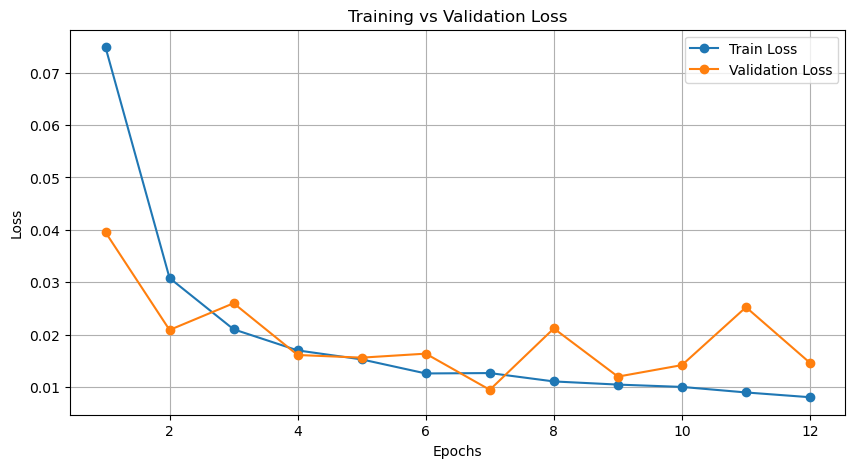

In [30]:
import json
import matplotlib.pyplot as plt

# Load the training metrics
with open("training_metrics.json", "r") as f:
    metrics = json.load(f)

# Extract values
train_losses = metrics["train_loss"]
val_losses = metrics["val_loss"]
epochs = range(1, len(train_losses) + 1)

# Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker="o")
plt.plot(epochs, val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


RESULTS FROM ThiS MODEL anD SO ON AND FORWARD

### **ResNet50 with more augmentations**

I will be performing the same Resnet50 model implementation. Augmentations are now gonna be these because this and that(ch answer)

## **References**

[1] Stephan Bohm, S., CAEBUS Center of Advanced E-Business Studies, & RheinMain University of Applied Sciences. (n.d.). HumanPerception and Classification of AI-Generated Images: APre-Study based on a sample from the media sector in Germany. In ThinkMind [Research paper]. The First International Conference on Generative Pre-trained Transformer Models and Beyond, Wiesbaden, Germany. https://www.thinkmind.org/articles/gptmb_2024_1_20_38004.pdf 

[2] Goodfellow, I. J., Pouget-Abadie, J., Mirza, M., Xu, B., Warde-Farley, D., Ozair, S., Courville, A., & Bengio, Y. (2014, June 10). Generative adversarial networks. arXiv.org. https://arxiv.org/abs/1406.2661

[3] Rombach, R., Blattmann, A., Lorenz, D., Esser, P., & Ommer, B. (2021, December 20). High-Resolution Image Synthesis with Latent Diffusion Models. arXiv.org. https://arxiv.org/abs/2112.10752

[4] Van Waning, J. (2024). Human Art vs AI Art, a Potential Danger for Artist? : Artistic and Economic Evaluations across Multiple Art Genres. In B. Liefooghe, Social, Health and Organizational Psychology. https://studenttheses.uu.nl/bitstream/handle/20.500.12932/47294/Thesis_JoA%cc%83%c2%ablvanWaning%202.pdf?sequence=1&isAllowed=y

[5] Kamali, N., Nakamura, K., Chatzimparmpas, A., Hullman, J., & Groh, M. (2024, June 12). How to Distinguish AI-Generated Images from Authentic Photographs. arXiv.org. https://arxiv.org/abs/2406.08651

[6] Bird, J. J., & Lotfi, A. (2023, March 24). CIFAKE: Image Classification and Explainable Identification of AI-Generated Synthetic Images. arXiv.org. https://arxiv.org/abs/2303.14126

[7] Ediboglu Bartos, G., & Akyol, S. (4 C.E.). Deep learning for image authentication [Alba Regia Technical Faculty Obuda University]. https://www.researchgate.net/publication/375952278_Deep_Learning_for_Image_Authentication_A_Comparative_Study_on_Real_and_AI-Generated_Image_Classification

[8] He, K., Zhang, X., Ren, S., & Sun, J. (2015, December 10). Deep residual learning for image recognition. arXiv.org. https://arxiv.org/abs/1512.03385

[9] O’Shea, K., & Nash, R. (2015, November 26). An introduction to convolutional neural networks. arXiv.org. https://arxiv.org/abs/1511.08458

[10] Maruthiram, B., Venkataramireddy, .G. Venkataramireddy, & Klick, M. K. (2024). Real VS AI Generated Image Detection and  Classification. International Journal of Innovative Research in Technology (IJIRT), 11(2), ISSN: 2349-6002. https://ijirt.org/publishedpaper/IJIRT166462_PAPER.pdf

[11] Kingma, D. P., & Welling, M. (2013, December 20). Auto-Encoding variational Bayes. arXiv.org. https://arxiv.org/abs/1312.6114

[12] Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., Dehghani, M., Minderer, M., Heigold, G., Gelly, S., Uszkoreit, J., & Houlsby, N. (2020, October 22). An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale. arXiv.org. https://arxiv.org/abs/2010.11929

[13] Selvaraju, R. R., Cogswell, M., Das, A., Vedantam, R., Parikh, D., & Batra, D. (2019). Grad-CAM: Visual Explanations from Deep Networks via Gradient-Based Localization. International Journal of Computer Vision, 128(2), 336–359. https://doi.org/10.1007/s11263-019-01228-7